<a href="https://colab.research.google.com/github/sonia-an/Data-Analysis-project/blob/main/Covid_19_Analysis_2nd_Aug_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis of recent Covid 19 cases 
COVID-19 country spread daily data into a Pandas DataFrame. Here I'm using dataset of 2nd August 2021.

## Analysis includes

1. Data acquisition: Scrape the COVID19 dataset and preparing it for the analysis 
2. Data cleaning:  is done by dropping columns, replace null values and special characters.
3. EDA: Overall analysis of the dataset and Visualizing analysis.


#Data Acquisition
 * Web scraping: The data present in this analysis scraped from the website worldometer. 

In [ ]:
# Import the following libraries:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import date,datetime
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
#import plotly.graph_objects as go

In [ ]:
url='https://www.worldometers.info/coronavirus/#countries'
req=requests.get(url)
soup=BeautifulSoup(req.text,'html')

In [ ]:
table=soup.findAll("table",{"id":"main_table_countries_today"})
containers=table[0].findAll("tr",{"style":""})
title=containers[0]
del containers[0]
for country in containers:
  country_data=[]
  country_container=country.findAll('td')#parsing the data
 

In [ ]:
all_data=[]
clean=True
for country in containers:
  country_data=[]
  country_container=country.findAll('td')#parsing the data
  for i in range(1,len(country_container)):
    final_data=country_container[i].text
    if clean:
      if final_data.find('+')!=-1:
        final_data=final_data.replace("+","")  #wherever + which will replace into empty 
   
      if final_data.find('-')!=-1:
          final_data=final_data.replace("-","")  #wherever - which will replace into empty 
          
      if  final_data.find(',')!=-1:
        final_data=final_data.replace(",","")
    country_data.append(final_data)
    
all_data.append(country_data)


##Create a dataframe

In [ ]:
# Create the dataframe
data=pd.DataFrame(all_data)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,Total:,200903699,656905,4268443,9529,180884011,371469,15751245,93468,25774.1,547.6,,,,All,\n,,,,,


#Data manipulation

Drop the unnecessary columns that are not required:

In [ ]:
data.drop([15,16,17,18,19,20],inplace=True,axis=1)


In [ ]:
#Add the column names
Column_labels=['Country','Total cases', 'New cases','Total Deaths','New Deaths','Total recovered','New recovered','Active cases','Serious/critical','Total cases/1M','Death/1M','Total tests','Test/1M','Population','Continent']
data.columns=Column_labels

In [ ]:
data.head(10)

,Country,Total cases,New cases,Total Deaths,New Deaths,Total recovered,New recovered,Active cases,Serious/critical,Total cases/1M,Death/1M,Total tests,Test/1M,Population,Continent
0,Total:,200899282,652457,4268369,9458,180883342,370800,15747571,93468,25773.5,547.6,,,,All


### Convert scraped data into csv file and create a dataframe  
The scraped data loaded into a Pandas DataFrame for easy analysis

In [ ]:
data.to_csv('covid_data2Aug.csv',index=False)

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/covid_data2Aug.csv')
data

,Country,Total cases,New cases,Total Deaths,New Deaths,Total recovered,New recovered,Active cases,Serious/critical,Total cases/1M,Death/1M,Total tests,Test/1M,Population,Continent
0,USA,35768924,NaN,629380,NaN,29673290.0,NaN,5466254.0,11513.0,107381,1889.0,529918049.0,1590850.0,333103730,North America
1,India,31695958,590.0,424808,NaN,30857467.0,7786.0,413683.0,8944.0,22726,305.0,469645494.0,336741.0,1394679506,Asia
2,Brazil,19938358,NaN,556886,NaN,18645993.0,NaN,735479.0,8318.0,93085,2600.0,55034721.0,256938.0,214194612,South America
3,Russia,6312185,23508.0,160137,785.0,5640783.0,14893.0,511265.0,2300.0,43233,1097.0,166200000.0,1138339.0,146002264,Europe
4,France,6146619,NaN,111885,NaN,5702014.0,NaN,332720.0,1137.0,93942,1710.0,105215767.0,1608067.0,65429963,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,Macao,59,NaN,,NaN,54.0,NaN,5.0,NaN,90,NaN,4671.0,7089.0,658901,Asia
207,Saint Pierre Miquelon,28,NaN,,NaN,26.0,NaN,2.0,NaN,4859,NaN,6128.0,1063335.0,5763,North America
208,Montserrat,21,NaN,1,NaN,19.0,NaN,1.0,NaN,4204,200.0,1408.0,281882.0,4995,North America
209,Western Sahara,10,NaN,1,NaN,8.0,NaN,1.0,NaN,16,2.0,NaN,NaN,613171,Africa


In [ ]:
data.describe()

,Total cases,New cases,New Deaths,Total recovered,New recovered,Active cases,Serious/critical,Total cases/1M,Death/1M,Total tests,Test/1M,Population
count,2.110000e+02,48.000000,28.000000,2.100000e+02,41.000000,2.100000e+02,147.000000,211.000000,205.000000,2.060000e+02,2.060000e+02,2.110000e+02
mean,9.436628e+05,2872.416667,120.535714,8.475838e+05,2858.243902,7.123970e+04,615.700680,41276.322275,702.180000,1.464493e+07,9.038209e+05,3.715459e+07
std,3.674708e+06,5766.678508,323.078076,3.319933e+06,6129.049575,3.969405e+05,1712.032872,42457.601539,848.945355,5.542447e+07,1.663334e+06,1.430019e+08
min,1.000000e+01,3.000000,1.000000,8.000000e+00,1.000000,1.000000e+00,1.000000,16.000000,0.300000,1.408000e+03,2.935000e+03,4.995000e+03
25%,1.135050e+04,88.500000,3.000000,7.036000e+03,40.000000,5.605000e+02,8.000000,3679.500000,62.000000,1.891418e+05,9.346700e+04,9.028510e+05
50%,9.419500e+04,276.000000,9.500000,7.646500e+04,531.000000,4.882000e+03,37.000000,28486.000000,353.000000,1.385674e+06,3.421280e+05,6.972274e+06
75%,4.308115e+05,1904.000000,49.250000,3.956650e+05,1800.000000,2.228100e+04,304.000000,71408.500000,1069.000000,7.192830e+06,9.803535e+05,2.645108e+07
max,3.576892e+07,23508.000000,1568.000000,3.085747e+07,32807.000000,5.466254e+06,11513.000000,189641.000000,5869.000000,5.299180e+08,1.314314e+07,1.439324e+09


In [ ]:
#convert to numeric data
for label in data.columns:
  if label !='Country' and label !='Continent':
    data[label]=data[label].apply(pd.to_numeric, errors='coerce') 

In [ ]:
data.dtypes

Country              object
Total cases           int64
New cases           float64
Total Deaths        float64
New Deaths          float64
Total recovered     float64
New recovered       float64
Active cases        float64
Serious/critical    float64
Total cases/1M        int64
Death/1M            float64
Total tests         float64
Test/1M             float64
Population            int64
Continent            object
dtype: object

## Check null values in each column

In [ ]:
data.isnull().sum()

Country               0
Total cases           0
New cases           163
Total Deaths          0
New Deaths          183
Total recovered       1
New recovered       170
Active cases          1
Serious/critical     64
Total cases/1M        0
Death/1M              6
Total tests           5
Test/1M               5
Population            0
Continent             0
dtype: int64

## check the null value using heat map

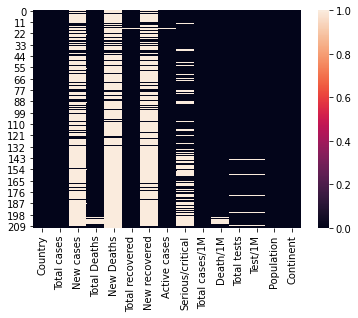

In [ ]:
sns.heatmap(data.isnull())
plt.show()  #state contains null values

## To avoid the null values in the DataFrame, replace them by -1 

In [ ]:
#Replace Null values with zeros 
data=data.replace(np.nan, -1)
data

,Country,Total cases,New cases,Total Deaths,New Deaths,Total recovered,New recovered,Active cases,Serious/critical,Total cases/1M,Death/1M,Total tests,Test/1M,Population,Continent
0,USA,35768924,-1.0,629380.0,-1.0,29673290.0,-1.0,5466254.0,11513.0,107381,1889.0,529918049.0,1590850.0,333103730,North America
1,India,31695958,590.0,424808.0,-1.0,30857467.0,7786.0,413683.0,8944.0,22726,305.0,469645494.0,336741.0,1394679506,Asia
2,Brazil,19938358,-1.0,556886.0,-1.0,18645993.0,-1.0,735479.0,8318.0,93085,2600.0,55034721.0,256938.0,214194612,South America
3,Russia,6312185,23508.0,160137.0,785.0,5640783.0,14893.0,511265.0,2300.0,43233,1097.0,166200000.0,1138339.0,146002264,Europe
4,France,6146619,-1.0,111885.0,-1.0,5702014.0,-1.0,332720.0,1137.0,93942,1710.0,105215767.0,1608067.0,65429963,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,Macao,59,-1.0,-1.0,-1.0,54.0,-1.0,5.0,-1.0,90,-1.0,4671.0,7089.0,658901,Asia
207,Saint Pierre Miquelon,28,-1.0,-1.0,-1.0,26.0,-1.0,2.0,-1.0,4859,-1.0,6128.0,1063335.0,5763,North America
208,Montserrat,21,-1.0,1.0,-1.0,19.0,-1.0,1.0,-1.0,4204,200.0,1408.0,281882.0,4995,North America
209,Western Sahara,10,-1.0,1.0,-1.0,8.0,-1.0,1.0,-1.0,16,2.0,-1.0,-1.0,613171,Africa


###Convert object type into numeric

In [ ]:
for label in data.columns:
  if label !='Country' and label !='Continent':
    data[label]=pd.to_numeric(data[label])

#  Exploratory Data Analysis (EDA) and Visualisation
1. What is the proportion of Top 5 Countries in the race of fighting Covid19?
2. Show and compare highest cases and highest death rate of first 5 countries
3. Show the top 14 countries conducting covid test
4. Show highest recovered cases of top 8 countries
5. Show top 6 countries serious/critical state
5. Show Top 10 countries have latest active cases 
6. Show Top 10 countries having active cases
7. Show new cases of continents
8. Show the population of continents
9. Show comparison bettween continents wise population and covid test


Exploratory Data Analysis (EDA)
It is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

### What is the proportion of Top 5 Countries in the race of fighting Covid19?









In [ ]:
Countries_Top5_Cases=data.sort_values('Total cases',ascending=False).head(5)
Countries_Top5_Cases

,Country,Total cases,New cases,Total Deaths,New Deaths,Total recovered,New recovered,Active cases,Serious/critical,Total cases/1M,Death/1M,Total tests,Test/1M,Population,Continent
0,USA,35768924,-1.0,629380.0,-1.0,29673290.0,-1.0,5466254.0,11513.0,107381,1889.0,529918049.0,1590850.0,333103730,North America
1,India,31695958,590.0,424808.0,-1.0,30857467.0,7786.0,413683.0,8944.0,22726,305.0,469645494.0,336741.0,1394679506,Asia
2,Brazil,19938358,-1.0,556886.0,-1.0,18645993.0,-1.0,735479.0,8318.0,93085,2600.0,55034721.0,256938.0,214194612,South America
3,Russia,6312185,23508.0,160137.0,785.0,5640783.0,14893.0,511265.0,2300.0,43233,1097.0,166200000.0,1138339.0,146002264,Europe
4,France,6146619,-1.0,111885.0,-1.0,5702014.0,-1.0,332720.0,1137.0,93942,1710.0,105215767.0,1608067.0,65429963,Europe


##Comparing Total test and death rate

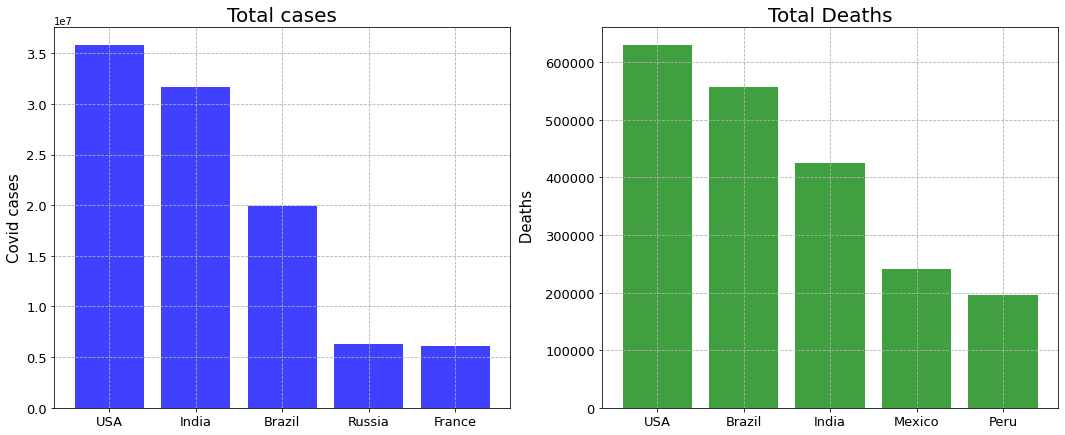

In [ ]:
Countries_Top5_Cases=data.sort_values('Total cases',ascending=False).head(5)
Countries_Top5_Deaths=data.sort_values('Total Deaths',ascending=False).head(5)
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(18,7))
ax1.bar(x=Countries_Top5_Cases['Country'],height=Countries_Top5_Cases['Total cases'],facecolor='b',alpha=0.75)
ax1.set_title('Total cases',fontsize=20)
ax1.set_ylabel("Covid cases",fontsize=15)
ax1.grid(ls="--")
ax1.tick_params(labelsize=13)
ax2.bar(x=Countries_Top5_Deaths['Country'],height=Countries_Top5_Deaths['Total Deaths'],facecolor='g',alpha=0.75)
ax2.set_title('Total Deaths',fontsize=20)
ax2.set_ylabel(" Deaths",fontsize=15,labelpad=10)
ax2.grid(ls="--")
ax2.tick_params(labelsize=13)
fig=px.bar(data.sort_values('Total cases',ascending=False).head(5),x='Country',y='Total cases',text='Total cases',title='Top 10 Total cases across different Countries')

#fig.show()

## Top 6 country's covid test rate

In [ ]:
#In which country has highest test recorded?
ds=data.groupby('Country')['Total tests'].sum().sort_values(ascending=False).head(14)
ds.reset_index()


,Country,Total tests
0,USA,529918049.0
1,India,469645494.0
2,UK,244114700.0
3,Russia,166200000.0
4,China,160000000.0
5,France,105215767.0
6,Italy,77711955.0
7,Denmark,76418034.0
8,Turkey,68120075.0
9,Austria,67201912.0


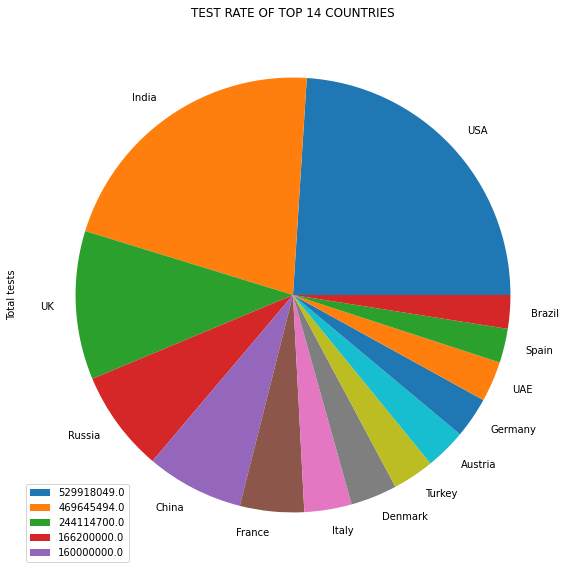

In [ ]:
ds.plot.pie(title="TEST RATE OF TOP 14 COUNTRIES",figsize=(13,10))
plt.legend(ds.head())

## Highest number of recovered cases

In [ ]:
top10_recovered = pd.DataFrame(data.groupby('Country')['Total recovered'].sum().nlargest(8).sort_values(ascending = False))
fig3 = px.bar(top10_recovered,x = top10_recovered.index, y = 'Total recovered', height = 600, title = 'Top 8 Covid 19 Recovered Countries', color= 'Total recovered',color_continuous_scale = px.colors.sequential.Viridis)
fig3.show()

In [ ]:
 top10_confirmed=pd.DataFrame(data.groupby('Country')['Active cases'].sum().nlargest(10).sort_values(ascending = False))
top10_confirmed.reset_index()

,Country,Active cases
0,USA,5466254.0
1,UK,1230749.0
2,Brazil,735479.0
3,Spain,654358.0
4,Indonesia,523164.0
5,Russia,511265.0
6,Iran,427328.0
7,India,413683.0
8,Mexico,398074.0
9,France,332720.0


In [ ]:
# Top 10 countries having active cases (scatter plot)

top10_confirmed = pd.DataFrame(data.groupby('Country')['Active cases'].sum().nlargest(10).sort_values(ascending = False))
fig = px.scatter(top10_confirmed,x = top10_confirmed.index,  y = 'Active cases', size = 'Active cases', size_max = 100,color = top10_confirmed.index, title = 'Top 10 Confirmed Cases Countries')

fig.show()

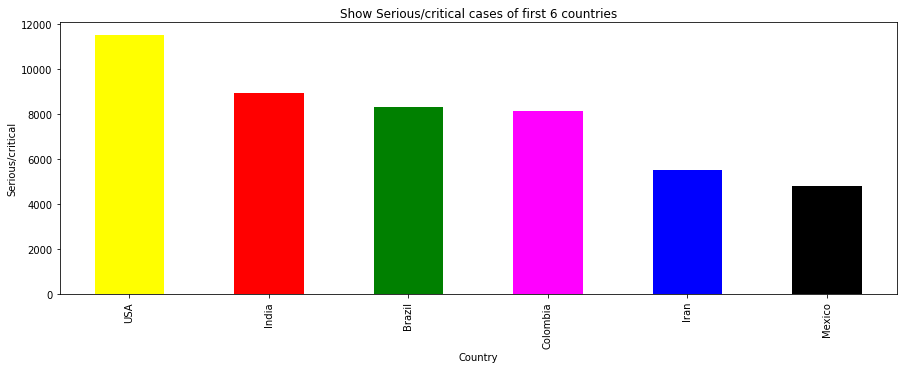

In [ ]:
# Show Serious/critical of first 6 countries
Country=data.groupby('Country')['Serious/critical'].sum().sort_values(ascending=False).head(6)
plt.xlabel("Country")
plt.ylabel("Serious/critical")
plt.title("Show Serious/critical cases of first 6 countries")
Country.plot.bar(figsize=(15,5),color=['yellow','red','green','magenta','blue','black','brown'])
plt.show()

#Load a data frame having continent wise covid data  

In [ ]:
continentdf=data.groupby('Continent').sum()
continentdf=continentdf.reset_index()
continentdf

,Continent,Total cases,New cases,Total Deaths,New Deaths,Total recovered,New recovered,Active cases,Serious/critical,Total cases/1M,Death/1M,Total tests,Test/1M,Population
0,Africa,6803092,5700.0,171479.0,189.0,5936884.0,4207.0,694729.0,4215.0,753437,11253.0,5.969898e+07,5576010.0,1375189545
1,Asia,62380090,99301.0,902861.0,2142.0,58322838.0,93297.0,3154390.0,34278.0,1682193,16466.9,1.105471e+09,41403385.0,4646181446
2,Australia/Oceania,105799,226.0,1532.0,-4.0,77270.0,-2.0,26996.0,109.0,108908,855.0,2.833754e+07,2072123.0,41426456
3,Europe,51610072,25380.0,1134987.0,758.0,46892252.0,18919.0,3582833.0,7935.0,3791091,69987.0,1.081801e+09,95288489.0,748118744
4,North America,42634503,6725.0,941194.0,101.0,35385038.0,-36.0,6308267.0,18554.0,1512648,20820.0,5.976329e+08,36298043.0,594102291
5,South America,35579288,381.0,1091089.0,6.0,31378314.0,633.0,1193120.0,25353.0,861027,24559.0,1.439131e+08,5549060.0,434600584


In [ ]:
top10_deaths = pd.DataFrame(continentdf.groupby('Continent')['New cases'].sum().nlargest(10).sort_values(ascending = True))
top10_deaths
fig2 = px.bar(top10_deaths, x = 'New cases', y = top10_deaths.index, height = 600, color = 'New cases', orientation = 'h',color_continuous_scale = ['deepskyblue','red'], title = 'New cases of Continents')
fig2.show()

In [ ]:
 #Show population of continents
fig=px.bar(continentdf.sort_values('Population',ascending=False),x='Continent',y='Population',text='Population',title=' population of Countinents')
fig.show()

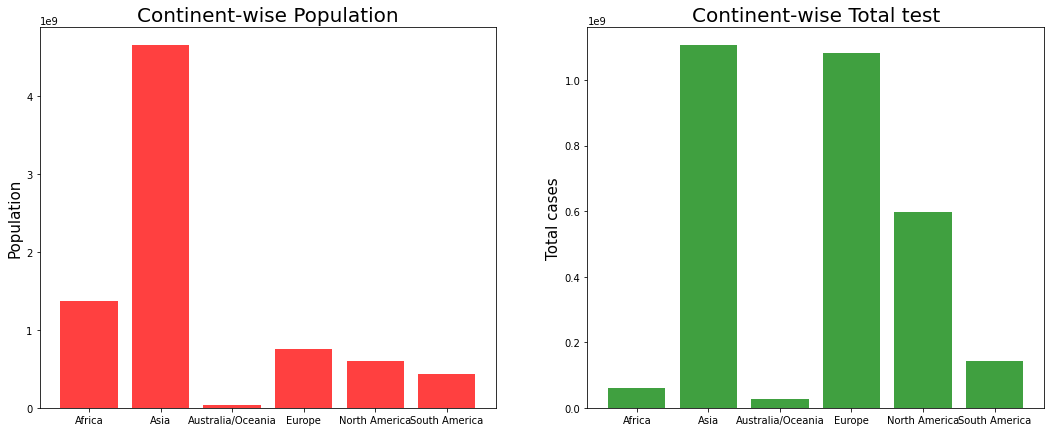

In [ ]:
 #Comparison between population and total cases ofcontinents
 fig,(px1,px2)=plt.subplots(nrows=1,ncols=2,figsize=(18,7))
 px1.set_title('Continent-wise Population',fontsize=20)
 px1.bar(x=continentdf['Continent'],height=continentdf['Population'],facecolor='r',alpha=0.75)
 px1.set_ylabel("Population",fontsize=15)
 px2.bar(x=continentdf['Continent'],height=continentdf['Total tests'],facecolor='g',alpha=0.75)
 px2.set_ylabel("Total cases",fontsize=15)
 px2.set_title('Continent-wise Total test',fontsize=20)
fig.show()
